In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

In [3]:
from src.vols.random_vol import *
from src.gans.ivgan import IVGan
from src.networks.ffn import FFNetwork
from src.utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
set_plot_params()

In [5]:
N_paths = 100000
total_timesteps = 60*60*7.5 #1 second data
n_timesteps = 60 #train at 1 min interval

vol_model = RandomVol(distribution = np.random.standard_normal)
spots, vols = vol_model.generate(N_paths, total_timesteps, n_timesteps, reshape_for_rnn=True)

In [7]:
generator = FFNetwork(n_layers=3, h_dims=32, loss=None, batch_norm = True, lr=0.00001)
discriminator = FFNetwork(n_layers=3, h_dims=32, loss=None,  batch_norm = True, lr=0.00002)

In [8]:
gan = IVGan(discriminator, generator)

Epoch 1 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

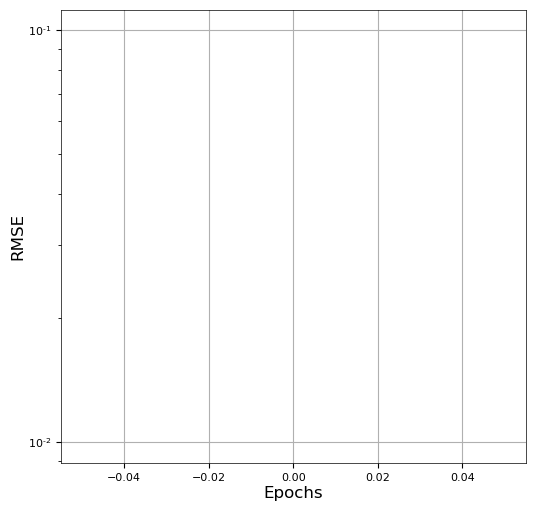

Epoch 2 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

In [ ]:
result = gan.train(x_train=spots.squeeze(-1),
        true_sample=np.random.normal(size=(N_paths, 1)),
        num_epochs=30,
        batch_size=264,
        clip=0.5,
        num_critic=5,
        show_hist=False,
        show_rmse = True,
        vol_model = vol_model
)